In [10]:
import Ploty as ploty 
import importlib
importlib.reload(ploty)
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [12]:
m = 1420    #kg
c = 0.31    #[-]
A = 2.24    #m^2
f = 0.01    #[-]
C = np.pi*(14*25.4 + 2*(60/100)*225)
rd = C/(2*np.pi)/1000

g= 9.81
rho = 1.23

v_max = 250/3.6   #założenie
F_res = m*g*f + 1/2*rho*A*c*v_max**2
P_res = F_res*v_max

#v = np.linspace(0,250/3.6,25)
#F_drag = 1/2*rho*A*c*v**2
#Fop = m*g*f + F_drag
#Pop = Fop*v/3600
#ploty.plot(v*3.6,Fop,'o', label='Tractive effort')

#F_res

([<matplotlib.lines.Line2D at 0x204ccaaf2b0>],
 <matplotlib.collections.PathCollection at 0x204cca7dcd0>)

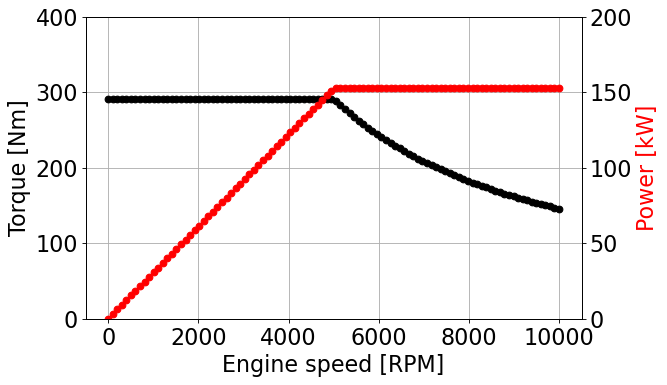

In [14]:
w_max = 10000 * np.pi/30   # RPM ----- > rad/s
w_base = w_max/2

w = np.linspace(0,w_max,100)


P_max = P_res
T = []
P = []

count = np.count_nonzero(w<w_base)
for i in range(count):
    T1 = P_max/w_base
    T = np.append(T,T1)

for i in range(count, len(w)):
    T2 = P_max/w[i]
    T = np.append(T,T2)

P = T*w
ploty.plot_double(w*30/np.pi,T, P/1000) 
#plt.xlim(0,10000)

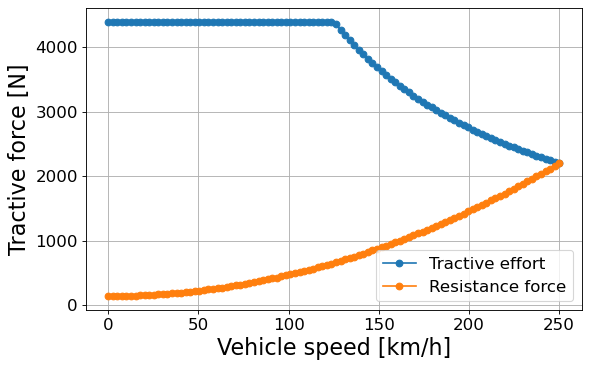

In [16]:
i_max = (w_max*rd)/v_max

v = w*rd/i_max
Ft = T*i_max/rd 
F1 = m*g*f
F2 = 1/2*rho*A*c*v**2
Fop = F1 + F2

ploty.plot(v*3.6,Ft,'o', label='Tractive effort')
plt.plot(v*3.6,Fop,marker='o',label='Resistance force')
plt.legend(loc='best',fontsize=15)
#plt.ylim(0,4200)
#plt.xlim(0,235)
plt.xlabel('Vehicle speed [km/h]',fontsize = 20)
plt.ylabel('Tractive force [N]',fontsize = 20, color='black')

v_final = w_max*rd/i_max
v_base = w_base*rd/i_max



Text(0, 0.5, 'Acceleration [$m/s^2$]')

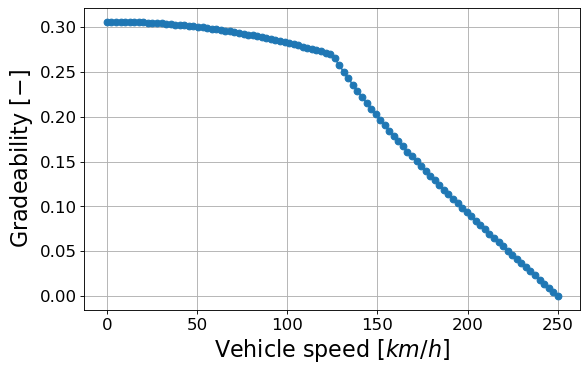

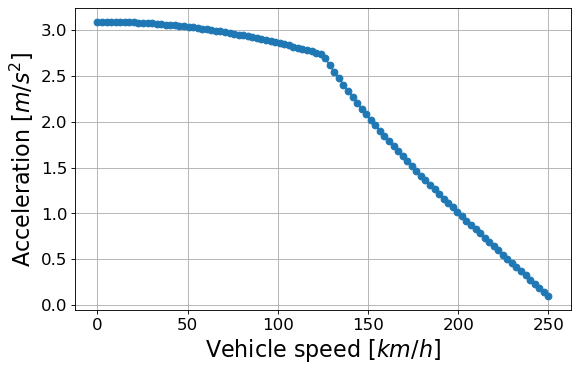

In [17]:
grade = (Ft - Fop)/(m*g)
D = (Ft - F2)/(m*g)
sin_a = (D - f*np.sqrt(1 - D**2 + f**2))/(1+f**2)

ploty.plot(v*3.6, sin_a, 'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Gradeability [$-$]',fontsize = 20)


alpha = np.arcsin(sin_a)
cos_a = np.cos(alpha)
F_rd = m*g*(f*cos_a + grade)
a = F_rd/m
#display(F_rd)
#display(alpha*180/np.pi)
# #display(np.tan(alpha)) ;
ploty.plot(v*3.6,a,'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Acceleration [$m/s^2$]',fontsize = 20)
#plt.ylim(0,2.5)
#plt.xlim(0,240)

Text(0, 0.5, 'Distance [$m$]')

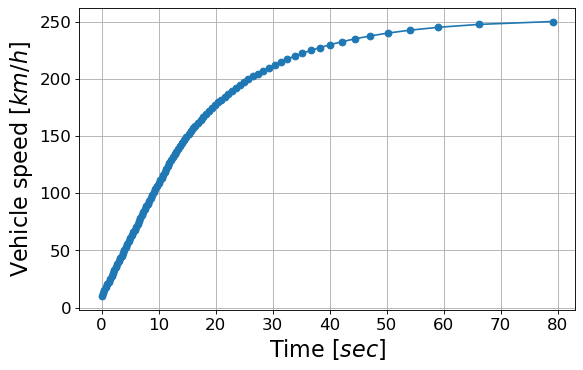

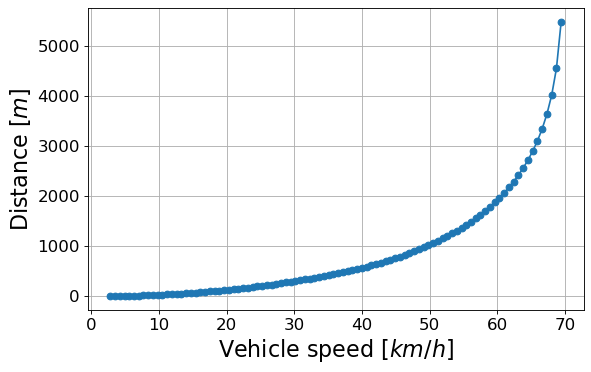

In [18]:
Pt = Ft * v
#ploty.plot(v,Pt,'o')
#ploty.plot(v,Ft,'o')
v1 = v[1:count]
v2 = v[count::]
'''
display(v1)
display(v2)
display(v)
'''

part1 = m*1.1/(Pt[1:count]/v1  - 1/2*rho*c*A*v1**2)
part2 = m*1.1/(Pt[count::]/v2 - m*g*f - 1/2*rho*c*A*v2**2)

t1 = integrate.cumtrapz(part1[0:-1]*np.diff(v1),initial=0)
t2 = integrate.cumtrapz(part2[0:-1]*np.diff(v2))
#t1 = np.cumsum(part1[0:-1]*np.diff(v1))
#t2 = np.cumsum(part2[0:-1]*np.diff(v2))

t2 = t2 + t1[-1]
#display(t1)
#display(t2)

ta = np.append(t1,t2)
#ploty.plot(t1,v1[2::]*3.6,'o')
#ploty.plot(t2,v2[1:-1]*3.6,'o')
ploty.plot(ta,v[4::]*3.6,'o')
plt.xlabel('Time [$sec$]',fontsize=20)
plt.ylabel('Vehicle speed [$km/h$]',fontsize = 20)

ploty.plot(v[4::],v[4::]*ta,'o')
plt.xlabel('Vehicle speed [$km/h$]',fontsize=20)
plt.ylabel('Distance [$m$]',fontsize = 20)




part1 = m/(Pt*(v<v_base)/v_base - m*g*f - 1/2*rho*c*A*v*(v<v_base)**2)
dv = np.linspace(0,v_base,150)

ta = integrate.cumtrapz(part1, dv, initial=0)

t = []
for i in range(count):
    t1 = v[i]/a[i]
    t = np.append(t,t1)

for i in range(count, len(v)):
    t2 = v[i]/a[i]
    t = np.append(t,t2)

ploty.plot(t[0:len(t)],v[0:len(t)]*3.6,'o')
display(v*3.6)
display(t)
#plt.xlim(0,20)